In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Data from [here](https://data.kcmo.org/Crime/KCPD-Crime-Data-2019/pxaa-ahcm)

In [3]:
df = pd.read_csv('../../data/KCPD_Crime_Data_2019.csv')

In [4]:
df.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
0,KC19019972,03/19/2019,08:48,03/19/2019,08:48,03/19/2019,09:33,Vehicular – Non-Injury,NaN,NaN,...,64161.0,PC1239,SCP,N,ARR CHA VDR,W,F,41.0,False,NaN
1,KC19020439,03/20/2019,17:11,03/20/2019,17:30,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,...,64068.0,NaN,OSPD,N,ARR CHA SUS,W,M,31.0,False,NaN
2,KC19021179,03/23/2019,09:40,03/23/2019,09:40,NaN,NaN,Vehicular – Injury,NaN,NaN,...,64155.0,PC0277,NPD,N,ARR CHA VDR,W,M,41.0,False,NaN
3,KC19021555,03/25/2019,07:35,03/25/2019,09:09,NaN,NaN,Possession/Sale/Distribution of a Controlled S...,35A,Drug / Narcotic Violations,...,64108.0,PJ1831,CPD,N,ARR CHA SUS,B,M,31.0,False,NaN
4,KC19021815,03/26/2019,06:04,03/26/2019,07:20,03/26/2019,08:00,Stealing – Shoplift,23C,Shoplifting,...,64133.0,PJ3601,EPD,N,VIC,NaN,NaN,NaN,False,NaN


In [5]:
df.shape

(78046, 23)

### What is a Time Series?

A time series is a sequence of numerical data points in successive order.

In [6]:
df.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
0,KC19019972,03/19/2019,08:48,03/19/2019,08:48,03/19/2019,09:33,Vehicular – Non-Injury,NaN,NaN,...,64161.0,PC1239,SCP,N,ARR CHA VDR,W,F,41.0,False,NaN
1,KC19020439,03/20/2019,17:11,03/20/2019,17:30,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,...,64068.0,NaN,OSPD,N,ARR CHA SUS,W,M,31.0,False,NaN
2,KC19021179,03/23/2019,09:40,03/23/2019,09:40,NaN,NaN,Vehicular – Injury,NaN,NaN,...,64155.0,PC0277,NPD,N,ARR CHA VDR,W,M,41.0,False,NaN
3,KC19021555,03/25/2019,07:35,03/25/2019,09:09,NaN,NaN,Possession/Sale/Distribution of a Controlled S...,35A,Drug / Narcotic Violations,...,64108.0,PJ1831,CPD,N,ARR CHA SUS,B,M,31.0,False,NaN
4,KC19021815,03/26/2019,06:04,03/26/2019,07:20,03/26/2019,08:00,Stealing – Shoplift,23C,Shoplifting,...,64133.0,PJ3601,EPD,N,VIC,NaN,NaN,NaN,False,NaN


In [8]:
df[df['Reported_Date'] == '03/20/2019']

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
1,KC19020439,03/20/2019,17:11,03/20/2019,17:30,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,...,64068.0,NaN,OSPD,N,ARR CHA SUS,W,M,31.0,False,NaN
785,KC19020290,03/20/2019,09:25,03/19/2019,20:15,03/20/2019,08:20,Stealing from Auto (Theft from Auto),23H,All Other Larceny,...,64154.0,PP0303,NPD,N,CMP VIC,W,F,44.0,False,5600 NW 87TH TER\nKANSAS CITY 64154\n(39.2534...
1206,KC19020462,03/20/2019,18:55,03/19/2019,21:00,03/20/2019,17:30,Burglary (Residential),220,Burglary/Breaking and Entering,...,64119.0,PC0613,NPD,N,CMP VIC,B,F,56.0,False,6100 N MADISON AVE\nKANSAS CITY 64119\n(39.20...
1866,KC19020338,03/20/2019,12:12,03/20/2019,10:00,NaN,NaN,Stealing from Auto (Auto Part or Accessory),23G,Theft of Vehicle Parts and Accessories,...,64151.0,PP0424,NPD,N,CMP VIC,W,M,59.0,False,2600 NW 79TH TER\nKANSAS CITY 64151\n(39.2378...
2139,KC19020364,03/20/2019,13:58,12/01/2018,:,03/01/2019,NaN,Unfounded,13B,Simple Assault,...,64124.0,NaN,EPD,N,VIC,W,M,NaN,False,600 HARDESTY AVE\nKANSAS CITY 64124\n(39.1052...
2203,KC19020485,03/20/2019,20:29,03/20/2019,20:29,NaN,NaN,Recovered Stolen Auto,280,Stolen Property Offenses,...,64117.0,PC1197,SCP,N,CHA INA SUS,W,F,27.0,False,N CLEVELAND AVE and NE 41ST ST\nKANSAS CITY 64...
2783,KC19020511,03/20/2019,23:26,03/20/2019,16:30,NaN,NaN,Identity Theft,26F,Identity Theft,...,64151.0,PP0373,NPD,N,CMP VIC,W,M,29.0,False,8200 NW WAUKOMIS DR\nKANSAS CITY 64151\n(39.2...
3153,KC19020372,03/20/2019,14:14,03/17/2019,18:30,NaN,NaN,Stealing – Other,23H,All Other Larceny,...,NaN,PC0386,NPD,N,SUS,U,M,NaN,False,"500 NW BARRY RD\nKANSAS CITY\n(39.246435, -94..."
3442,KC19020364,03/20/2019,13:58,12/01/2018,:,03/01/2019,NaN,Unfounded,13B,Simple Assault,...,64124.0,NaN,EPD,N,VIC,W,F,NaN,False,600 HARDESTY AVE\nKANSAS CITY 64124\n(39.1052...
3816,KC19020493,03/20/2019,20:01,03/20/2019,17:30,NaN,NaN,Stolen Auto,240,Motor Vehicle Theft,...,64157.0,PC0430,SCP,N,ARR CHA,W,M,26.0,False,9800 NE BARRY RD\nKANSAS CITY 64157\n(39.2447...


In [11]:
df['Offense'].value_counts(normalize = True)

Domestic Violence Assault (Non-Aggravated)    0.079850
Assault (Aggravated)                          0.058401
Stolen Auto                                   0.057710
Stealing – Shoplift                           0.056825
Property Damage                               0.055659
                                                ...   
Outside Correspondence                        0.000026
Incest                                        0.000026
Tampering with Physical Evidence              0.000013
Tobacco Law Violation                         0.000013
Cold Case Homicide                            0.000013
Name: Offense, Length: 137, dtype: float64

In [12]:
df_pd = df[df['Offense'] == 'Property Damage'].copy()
df_pd.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
5,KC19021991,03/26/2019,17:49,03/25/2019,20:10,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,...,64133.0,NaN,MPD,N,VIC,B,M,61.0,False,NaN
33,KC19024382,04/04/2019,08:27,04/03/2019,20:56,04/03/2019,21:04,Property Damage,290,Vandalism/Destruction of Property,...,64108.0,PJ2072,CPD,N,VIC,NaN,NaN,NaN,False,NaN
47,KC19026110,04/10/2019,14:36,04/05/2019,12:30,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,...,64118.0,PC1221,SCP,N,VIC,NaN,NaN,NaN,False,NaN
66,KC19027946,04/17/2019,09:07,04/15/2019,18:00,04/15/2019,23:50,Property Damage,290,Vandalism/Destruction of Property,...,64119.0,PC1231,SCP,N,VIC,W,M,69.0,False,NaN
145,KC19037132,05/20/2019,10:54,05/10/2019,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,...,64127.0,NaN,EPD,N,SUS,B,M,NaN,False,NaN


In [13]:
df_pd.shape

(4344, 23)

In [15]:
df_pd[df_pd['Reported_Date'] == '05/20/2019'].head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
145,KC19037132,05/20/2019,10:54,05/10/2019,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,...,64127.0,NaN,EPD,N,SUS,B,M,NaN,False,NaN
2983,KC19037040,05/20/2019,02:42,05/19/2019,16:50,05/20/2019,02:00,Property Damage,290,Vandalism/Destruction of Property,...,64105.0,NaN,CPD,N,CMP VIC,W,F,23.0,False,800 WYANDOTTE ST\nKANSAS CITY 64105\n(39.1043...
6181,KC19037159,05/20/2019,12:23,05/19/2019,19:00,05/20/2019,11:45,Property Damage,290,Vandalism/Destruction of Property,...,NaN,PC1082,SCP,N,VIC,W,M,49.0,False,"4400 N TOPPING AVE\nKANSAS CITY\n(39.173509, ..."
6793,KC19037071,05/20/2019,08:05,05/19/2019,22:00,05/20/2019,08:00,Property Damage,290,Vandalism/Destruction of Property,...,64110.0,PJ4758,MPD,N,SUS,W,M,42.0,False,6000 TROOST AVE\nKANSAS CITY 64110\n(39.01794...
7113,KC19037132,05/20/2019,10:54,05/10/2019,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,...,64127.0,NaN,EPD,N,VIC,I,F,61.0,False,NaN


In [16]:
df_pd.isnull().sum()

Report_No               0
Reported_Date           0
Reported_Time           0
From_Date               0
From_Time               0
To_Date              2413
To_Time              2418
Offense                 0
IBRS                  341
Description           341
Beat                   76
Address                 0
City                    0
Zip Code              801
Rep_Dist             1599
Area                  118
DVFlag                  0
Involvement             0
Race                  796
Sex                   752
Age                  1119
Firearm Used Flag       0
Location              595
dtype: int64

In [17]:
df_pd.set_index('Reported_Date', inplace = True)
df_pd.head()

,Report_No,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
Reported_Date,,,,,,,,,,,,,,,,,,,,,
03/26/2019,KC19021991,17:49,03/25/2019,20:10,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,212,...,64133.0,NaN,MPD,N,VIC,B,M,61.0,False,NaN
04/04/2019,KC19024382,08:27,04/03/2019,20:56,04/03/2019,21:04,Property Damage,290,Vandalism/Destruction of Property,115,...,64108.0,PJ2072,CPD,N,VIC,NaN,NaN,NaN,False,NaN
04/10/2019,KC19026110,14:36,04/05/2019,12:30,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,632,...,64118.0,PC1221,SCP,N,VIC,NaN,NaN,NaN,False,NaN
04/17/2019,KC19027946,09:07,04/15/2019,18:00,04/15/2019,23:50,Property Damage,290,Vandalism/Destruction of Property,632,...,64119.0,PC1231,SCP,N,VIC,W,M,69.0,False,NaN
05/20/2019,KC19037132,10:54,05/10/2019,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,331,...,64127.0,NaN,EPD,N,SUS,B,M,NaN,False,NaN


In [18]:
df_pd.resample('D').count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [19]:
df_pd.index

Index(['03/26/2019', '04/04/2019', '04/10/2019', '04/17/2019', '05/20/2019',
       '05/25/2019', '05/27/2019', '06/15/2019', '06/16/2019', '06/18/2019',
       ...
       '12/24/2019', '12/14/2019', '12/04/2019', '12/09/2019', '11/26/2019',
       '12/13/2019', '12/18/2019', '12/12/2019', '11/20/2019', '12/17/2019'],
      dtype='object', name='Reported_Date', length=4344)

In [20]:
df_pd.index = pd.to_datetime(df_pd.index)
df_pd.index

DatetimeIndex(['2019-03-26', '2019-04-04', '2019-04-10', '2019-04-17',
               '2019-05-20', '2019-05-25', '2019-05-27', '2019-06-15',
               '2019-06-16', '2019-06-18',
               ...
               '2019-12-24', '2019-12-14', '2019-12-04', '2019-12-09',
               '2019-11-26', '2019-12-13', '2019-12-18', '2019-12-12',
               '2019-11-20', '2019-12-17'],
              dtype='datetime64[ns]', name='Reported_Date', length=4344, freq=None)

In [22]:
df_pd.resample('D')['Report_No'].count()

Reported_Date
2019-03-18     2
2019-03-19     2
2019-03-20     3
2019-03-21     4
2019-03-22     0
              ..
2019-12-27    16
2019-12-28     8
2019-12-29    24
2019-12-30     5
2019-12-31    13
Freq: D, Name: Report_No, Length: 289, dtype: int64

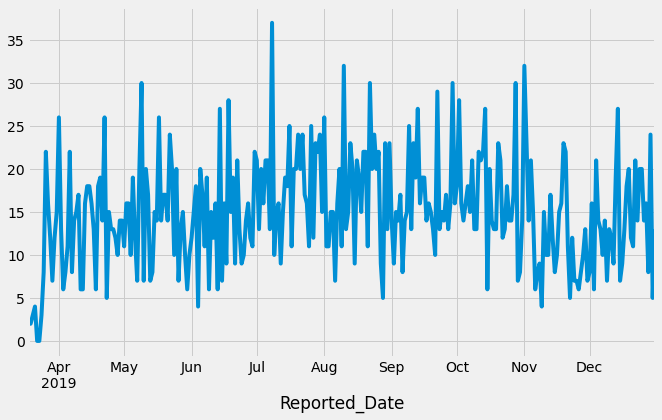

In [24]:
with plt.style.context('fivethirtyeight'):
    df_pd.resample('D')['Report_No'].count().plot(kind = 'line',
                                                 figsize = (10, 6))

In [27]:
df_daily = df_pd.resample('D')['Report_No'].count()

In [29]:
(df_daily == 0).sum()

2

In [30]:
df_daily[df_daily == 0]

Reported_Date
2019-03-22    0
2019-03-23    0
Freq: D, Name: Report_No, dtype: int64

In [31]:
df_daily.isnull().sum()

0

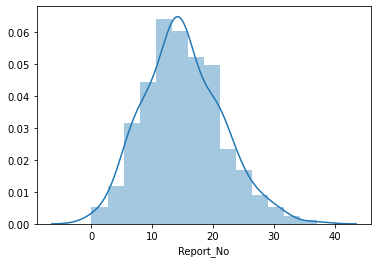

In [32]:
import seaborn as sns 

sns.distplot(df_daily)

In [33]:
df_daily.describe()

count    289.000000
mean      15.031142
std        6.368521
min        0.000000
25%       11.000000
50%       15.000000
75%       20.000000
max       37.000000
Name: Report_No, dtype: float64

## Stationarity

A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time. 

Why is it important? Because most time series models work on the assumption that **the time series are stationary**.

In [42]:
rolling_mean = df_daily.rolling(window = 7).mean()
rolling_std = df_daily.rolling(window = 7).std()

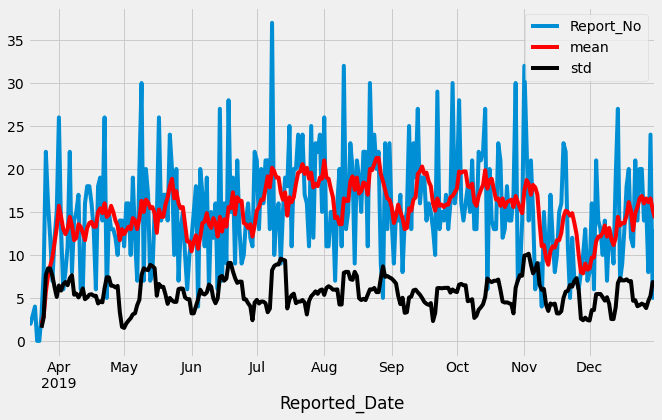

In [43]:
with plt.style.context('fivethirtyeight'):
    df_daily.plot(kind = 'line', figsize = (10, 6))
    rolling_mean.plot(kind = 'line', color = 'red', label = 'mean')
    rolling_std.plot(kind = 'line', color = 'black', label = 'std')
    plt.legend()

Another option is to run a [Dickey-Fuller Test](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)  

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
adfuller(df_daily)

(-7.710681455914594,
 1.2663057571336074e-11,
 2,
 286,
 {'1%': -3.4534232986669546,
  '5%': -2.8716994185534745,
  '10%': -2.5721833625116144},
 1753.5811441101437)

Here's a dataset from Learn.co, lets see how it does with the Dickey Fuller Test 

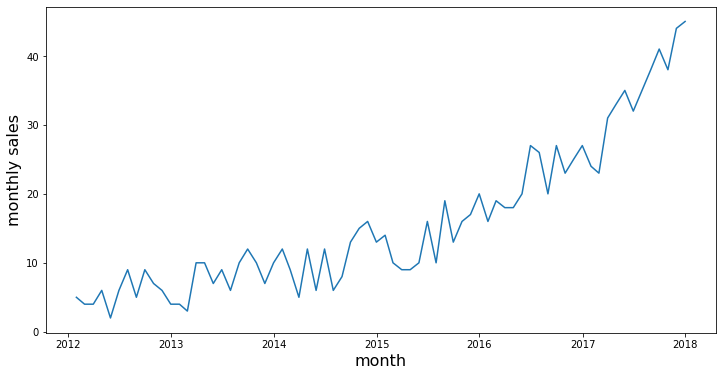

In [46]:
import numpy as np

years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts = data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel('month', fontsize=16)
plt.ylabel('monthly sales', fontsize=16)
plt.show()

Examples of [Non-Stationarity](https://learn.co/tracks/module-4-data-science-career-2-1/big-data-deep-learning-and-natural-language-processing/section-37-working-with-time-series-data/types-of-trends)

In [47]:
adfuller(ts)

(3.761375741674095,
 1.0,
 8,
 63,
 {'1%': -3.5386953618719676,
  '5%': -2.9086446751210775,
  '10%': -2.591896782564878},
 314.84474355172597)

In [49]:
ts.diff(periods = 1).head()

2012-01-31    NaN
2012-02-29   -1.0
2012-03-31    0.0
2012-04-30    2.0
2012-05-31   -4.0
Freq: M, dtype: float64

In [50]:
ts.head()

2012-01-31    5
2012-02-29    4
2012-03-31    4
2012-04-30    6
2012-05-31    2
Freq: M, dtype: int64

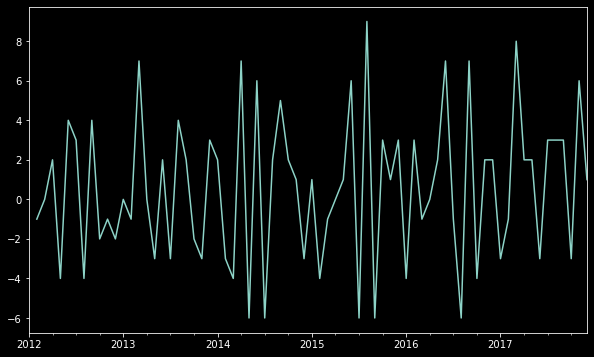

In [51]:
ts_diff = ts.diff(periods = 1)
with plt.style.context('dark_background'):
    ts_diff.plot(kind = 'line', figsize = (10, 6))

In [52]:
adfuller(ts_diff)

MissingDataError: exog contains inf or nans

In [54]:
adfuller(ts_diff.dropna())

(-6.455929660591099,
 1.4835154528970987e-08,
 2,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 311.5103050425881)

- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Residuals: The random variation in the series.

<img src="images/trendseasonal.png" alt="Drawing" style="width: 800px;"/>

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
decomposition = seasonal_decompose(df_daily)

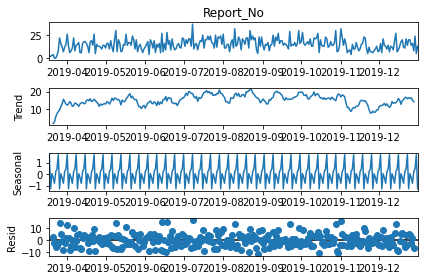

In [60]:
decomposition.plot();

In [61]:
dir(decomposition)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [84]:
df_daily.mean()

15.03114186851211

In [86]:
decomposition.seasonal.head(25)

Reported_Date
2019-03-18    1.696653
2019-03-19   -1.285490
2019-03-20    0.035938
2019-03-21   -0.306135
2019-03-22   -0.804393
2019-03-23    0.206060
2019-03-24    0.457367
2019-03-25    1.696653
2019-03-26   -1.285490
2019-03-27    0.035938
2019-03-28   -0.306135
2019-03-29   -0.804393
2019-03-30    0.206060
2019-03-31    0.457367
2019-04-01    1.696653
2019-04-02   -1.285490
2019-04-03    0.035938
2019-04-04   -0.306135
2019-04-05   -0.804393
2019-04-06    0.206060
2019-04-07    0.457367
2019-04-08    1.696653
2019-04-09   -1.285490
2019-04-10    0.035938
2019-04-11   -0.306135
Freq: D, Name: seasonal, dtype: float64

In [83]:
decomposition.trend.head(25)

Reported_Date
2019-03-18          NaN
2019-03-19          NaN
2019-03-20          NaN
2019-03-21     2.000000
2019-03-22     2.857143
2019-03-23     5.714286
2019-03-24     7.571429
2019-03-25     8.714286
2019-03-26     9.714286
2019-03-27    11.428571
2019-03-28    13.142857
2019-03-29    15.714286
2019-03-30    14.428571
2019-03-31    13.000000
2019-04-01    12.428571
2019-04-02    13.000000
2019-04-03    14.428571
2019-04-04    13.428571
2019-04-05    11.714286
2019-04-06    12.000000
2019-04-07    13.571429
2019-04-08    13.285714
2019-04-09    12.571429
2019-04-10    11.714286
2019-04-11    13.142857
Freq: D, Name: trend, dtype: float64

In [85]:
decomposition.trend.tail(25)

Reported_Date
2019-12-07    13.142857
2019-12-08    11.857143
2019-12-09    11.142857
2019-12-10    12.000000
2019-12-11    14.428571
2019-12-12    13.428571
2019-12-13    13.714286
2019-12-14    13.714286
2019-12-15    14.571429
2019-12-16    16.142857
2019-12-17    15.142857
2019-12-18    12.857143
2019-12-19    14.857143
2019-12-20    15.571429
2019-12-21    16.571429
2019-12-22    16.857143
2019-12-23    16.000000
2019-12-24    16.571429
2019-12-25    16.142857
2019-12-26    16.571429
2019-12-27    15.285714
2019-12-28    14.285714
2019-12-29          NaN
2019-12-30          NaN
2019-12-31          NaN
Freq: D, Name: trend, dtype: float64

In [64]:
decomposition.seasonal.head(14)

Reported_Date
2019-03-18    1.696653
2019-03-19   -1.285490
2019-03-20    0.035938
2019-03-21   -0.306135
2019-03-22   -0.804393
2019-03-23    0.206060
2019-03-24    0.457367
2019-03-25    1.696653
2019-03-26   -1.285490
2019-03-27    0.035938
2019-03-28   -0.306135
2019-03-29   -0.804393
2019-03-30    0.206060
2019-03-31    0.457367
Freq: D, Name: seasonal, dtype: float64

In [65]:
pd_daily = pd.DataFrame(df_daily)
pd_daily.head()

,Report_No
Reported_Date,
2019-03-18,2
2019-03-19,2
2019-03-20,3
2019-03-21,4
2019-03-22,0


In [67]:
pd_daily['DoW'] = pd_daily.index.day_name()
pd_daily.head(7)

,Report_No,DoW
Reported_Date,,
2019-03-18,2,Monday
2019-03-19,2,Tuesday
2019-03-20,3,Wednesday
2019-03-21,4,Thursday
2019-03-22,0,Friday
2019-03-23,0,Saturday
2019-03-24,3,Sunday


In [68]:
decomposition.seasonal.head(7)

Reported_Date
2019-03-18    1.696653
2019-03-19   -1.285490
2019-03-20    0.035938
2019-03-21   -0.306135
2019-03-22   -0.804393
2019-03-23    0.206060
2019-03-24    0.457367
Freq: D, Name: seasonal, dtype: float64

In [73]:
df_dow = pd.DataFrame(pd_daily.groupby('DoW')['Report_No'].sum())
df_dow

,Report_No
DoW,
Friday,585
Monday,684
Saturday,628
Sunday,650
Thursday,605
Tuesday,575
Wednesday,617


In [74]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [75]:
mapping = {day: i for i, day in enumerate(weekdays)}
mapping

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [76]:
key = df_dow.index.map(mapping)
key

Int64Index([4, 0, 5, 6, 3, 1, 2], dtype='int64', name='DoW')

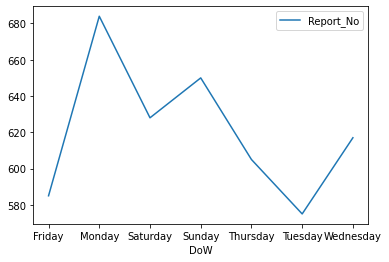

In [79]:
df_dow.plot(kind = 'line')

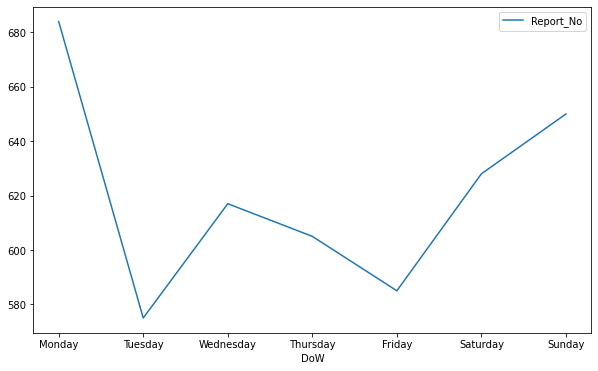

In [81]:
df_dow.iloc[key.argsort()].plot(kind = 'line', 
                               figsize = (10, 6))

## Further Details 
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/#:~:text=Trend%3A%20The%20increasing%20or%20decreasing,random%20variation%20in%20the%20series.